**Progress:**

5.1 (page 141 (163)) after the section "The cost of pretraining LLMs"
**(also watch groundzero.ai's videos)** 
DOUBT ABOUT OUTPUT: Whole input with increasing size due to appending generated output token, or like sliding window where first token is removed - one thing to note, in *data loading*, we do use sliding window to have consistent input sizes and move forward

(EXPLORE ABOUT WHY of the stuff so far)

EXERCISE 3.1 (page 73 (95))


**Notes:**

- KEEP REFERRING TO SUMMARIES OF CHAPTERS and DO EXERCISES

- Appendix A - a lot about PyTorch
- Transformers: has encoder and decoder 
- BERT focused more on the encoder part to excel at text completion tasks, GPT on decoder for text generation.
- zero shot: generalize to completely unseen tasks without any prior specific examples. 
- few-shot learning: involves learning from a minimal number of examples the user provides as input

- GPT models are pretrained on a relatively simple next-word prediction task
- Modern LLMs are trained in two main steps: 
  – First, they are pretrained on a large corpus of unlabeled text by using the prediction of the next word in a sentence as a label.
  – Then, they are fine-tuned on a smaller, labeled target dataset to follow instructions or perform classification tasks.
- LLMs are based on the transformer architecture. The key idea of the transformer  architecture is an attention mechanism that gives the LLM selective access
- A computational graph is a directed graph that allows us to express and visualize mathematical expressions.
- partial derivatives measure the rate at which a function changes with respect to one of its variables. 
- A gradient is a vector containing all of the partial derivatives of a multivariate function, a function with more than one variable as input.
- the chain rule is a way to compute gradients of a loss function given the model’s parameters in a computation graph. This provides the information needed to update each parameter to minimize the loss function.

- To get embeddings, we first need to tokenize all the words and assign them token IDs 
- we add a special token for new words not in a trained vocab. for eg: vocab: ("hello", id: 2), ("hi", id: 4).  text: "hello hi yo" -> "yo" will be treated as, say, a predefined token "<|unk|>" which we already add in the vocab during its creation.
- <|endoftext|> is also a commonly used special token to mark separation of sentences - usually assigned the largest token ID value.
- Byte-Pair Encoding (BPE) is commonly used to handle unknown words, more about BPE on page 34 (56) end, and GPT.
- While token embeddings provide consistent vector representations for each token, they lack a sense of the token’s position in a sequence. To rectify this, two main types of positional embeddings exist: absolute and relative. OpenAI’s GPT models utilize absolute positional embeddings, which are added to the token embedding vectors and are optimized during the model training.
- say, the token embeddings had 256 dimensions for each input token, we would create a pos_embedding of 256 dimensions (like [0,1,2,.....]) and append to token embeddings to get final input embeddings

- In practice, we often use a third dataset, a so-called validation dataset, to find the optimal hyperparameter settings. A validation dataset is similar to a test set. However, while we only want to use a test set precisely once to avoid biasing the evaluation, we usually use the validation set multiple times to tweak the model settings. 

- ***(more should be read about 2.7 and 2.8 which isn't summarized here)***

- In self-attention, the “self” refers to the mechanism’s ability to compute attention
 weights by relating different positions within a single input sequence. It assesses and
 learns the relationships and dependencies between various parts of the input itself,
 such as words in a sentence or pixels in an image. 
-This is in contrast to traditional attention mechanisms, where the focus is on the rela
tionships between elements of two different sequences, such as in sequence-to
sequence models where the attention might be between an input sequence and an
 output sequence, such as the example depicted in figure 3.5. 


- For example, consider an input text like “Your journey starts with one step.” In this
 case, each element of the sequence, such as x(1), corresponds to a d-dimensional embedding vector representing a specific token, like “Your.” Figure 3.7 shows these
 input vectors as three-dimensional embeddings.
- In self-attention, our goal is to calculate context vectors z(i) for each element x(i) in the input sequence. A context vector can be interpreted as an enriched embedding vector.
- To illustrate this concept, let’s focus on the embedding vector of the second input element, x(2) (which corresponds to the token “journey”), and the corresponding context vector, z(2), shown at the bottom of figure 3.7. This enhanced context vector, z(2), is an embedding that contains information about x(2) and all other input elements, x(1) to x(T)

 - The goal of self-attention is to compute a context vector for each input element that combines information from all other input elements. In this example, we compute the context vector z(2). The importance or contribution of each input element for computing z(2) is determined by the attention weights 21 to 2T. When computing z(2), the attention weights are calculated with respect to input element x(2) and all other inputs. (fig 3.7)
- The context vector z(2) is computed as a combination of all input vectors weighted with respect to input element x(2)
- In the context of self-attention mechanisms, the dot product determines the extent to which each element in a sequence focuses on, or “attends to,” any other element: the higher the dot product, the higher the similarity and attention score between two elements.
- to summarize: attention scores (n) -> attention weights (n) -> context vector (m) 
  no of dimensions: n = no of input tokens, m = no of dimensions
- multiplying embedding vectors with each other (to get attention scores) and other similar operations can simplified and made efficient using matrix multpln

**FROM HERE, REFER TO CODE MORE AND COME HERE FOR EXTRA POINTS TO ELBORATE FURTHER AND ADD ON**

- The embedding sizes of the token inputs and context embeddings are the same in GPT models (d_in = d_out).
- causal attention does not focus on future tokens, mainly to avoid overfitting
- multi-head attention layers multiple causal attention modules with their own set of weights and combines their outputs
- page 111 -> see appendix B for more details on output projection layer
- in single-headed, we process every dimension (can be thought of as different properties like syntax, semantics, etc.) at once, in multi-headed, we process subset of dimensions independently and combining them at the end.
  can be thought of as 6 * 6 vs (3 * 3) + (3 * 3)

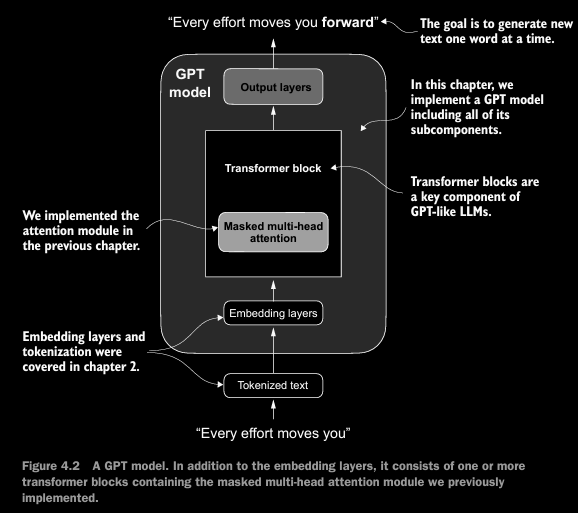
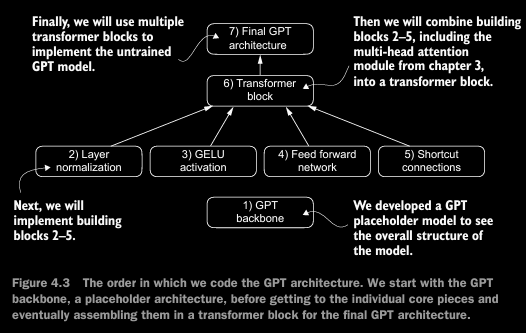
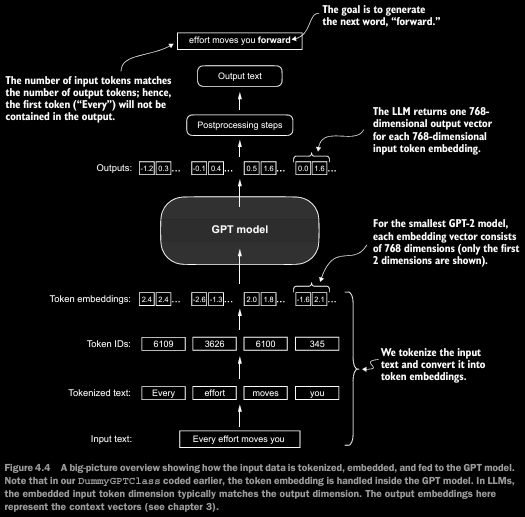

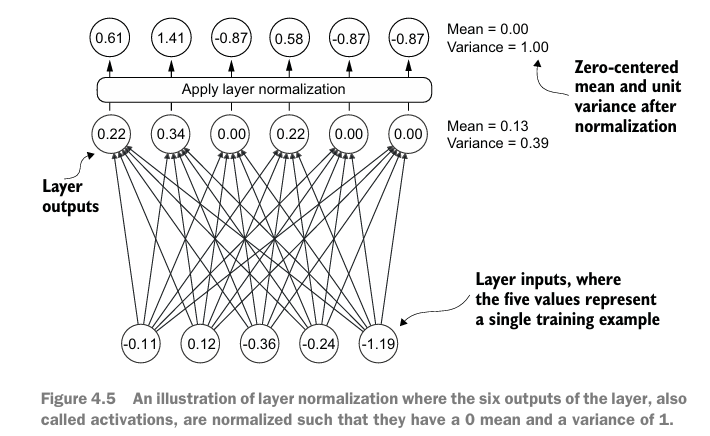

- **The main idea behind layer normalization is to adjust the activations (outputs) of a neural network layer to have a mean of 0 and a variance of 1, also known as unit variance.**

This adjustment speeds up the convergence to effective weights and ensures consistent, reliable training. In GPT-2 and modern transformer architectures, layer normalization is typically applied before and after the multi-head attention module, and, as we have seen with the DummyLayerNorm placeholder, before the final output layer.

Unlike batch normalization, which **normalizes across the _batch dimension_**, layer normalization **normalizes across the _feature dimension_**. 
LLMs often require significant computational resources, and the available hardware or the specific use case can dictate the batch size during training or inference. Since layer normalization normalizes each input independently of the batch size, it offers more flexibility and stability in these scenarios. This is particularly beneficial for distributed training or when deploying models in environments where resources are constrained.


As we can see below, **ReLU** is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero
**GELU** is a smooth, non-linear function that approximates ReLU but with a non-zero gradient for negative values (except at approximately -0.75)

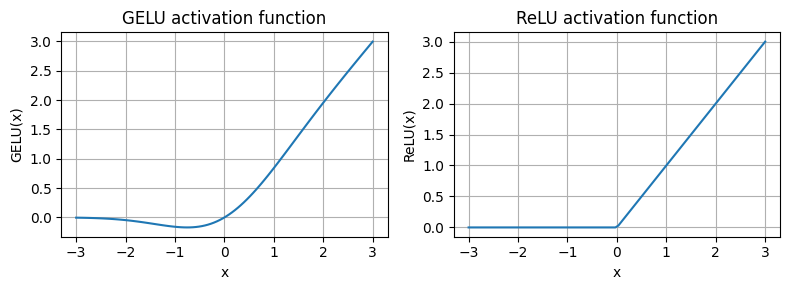

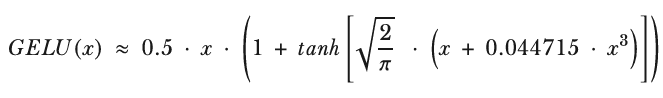

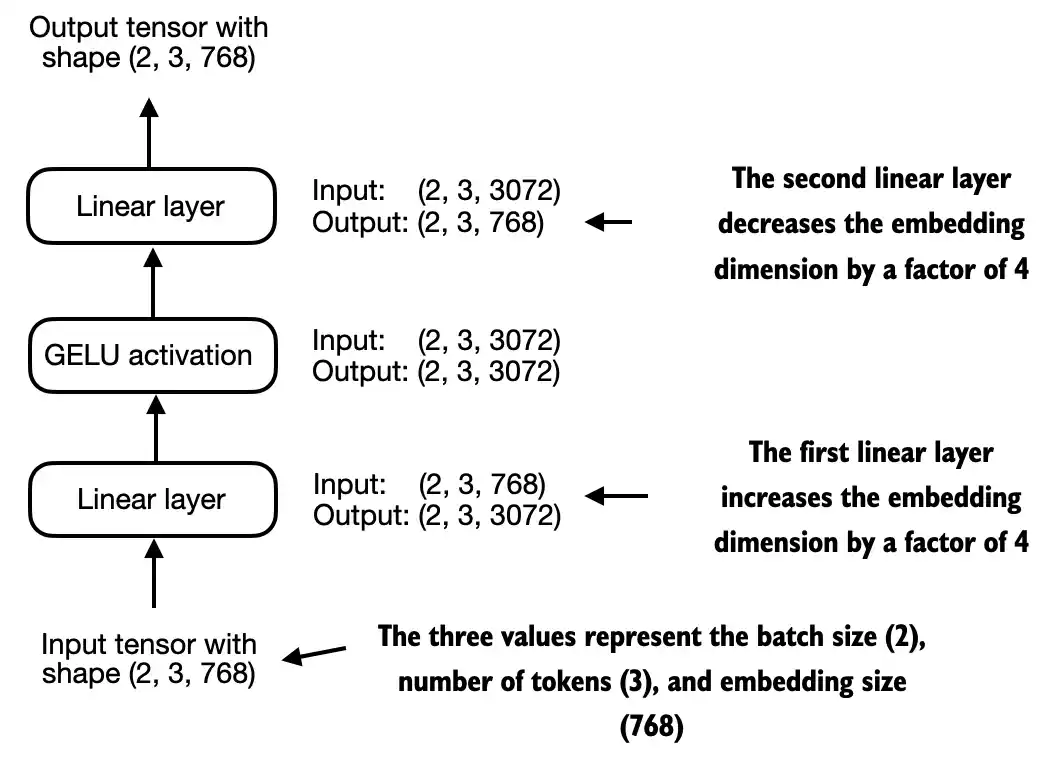

A **shortcut connection** creates an alternative, shorter path for the gradient to flow through the network 
by skipping one or more layers, which isachieved by adding the output of one layer to the output of a later layer
this is helpful in addressing the vanishing gradient problem as we reach earlier layers

for a layer, instead of receiving x and outputing f(x) for next layer, we receive x and output f(x) + x

DOUBT ABOUT OUTPUT: Whole input with increasing size due to appending generated output token, or like sliding window where first token is removed

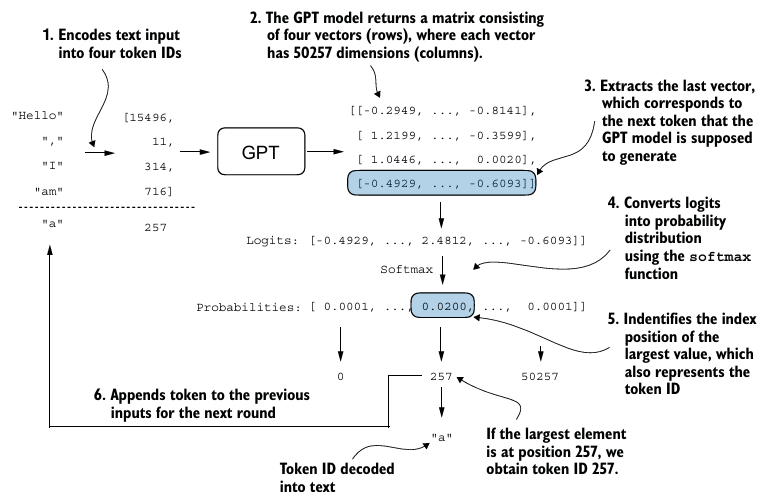

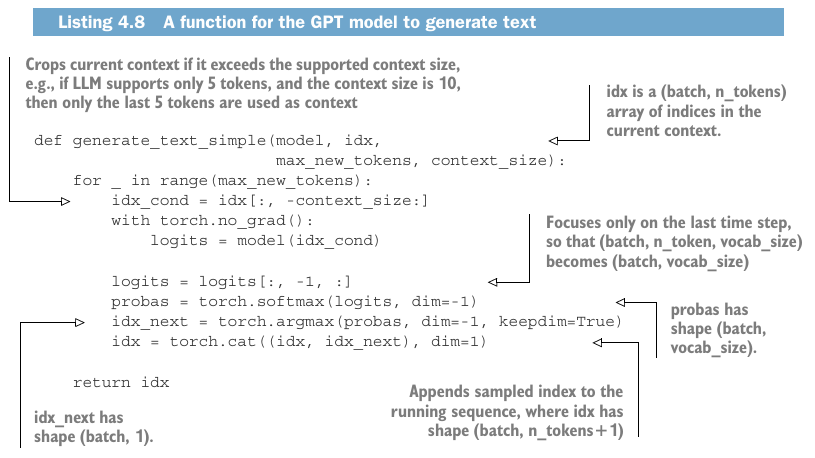

When we implement the GPT training code in the next chapter, we will use additional sampling techniques to modify the softmax outputs such that the model doesn’t always select the most likely token. This introduces variability and creativity in the gen
erated text. 

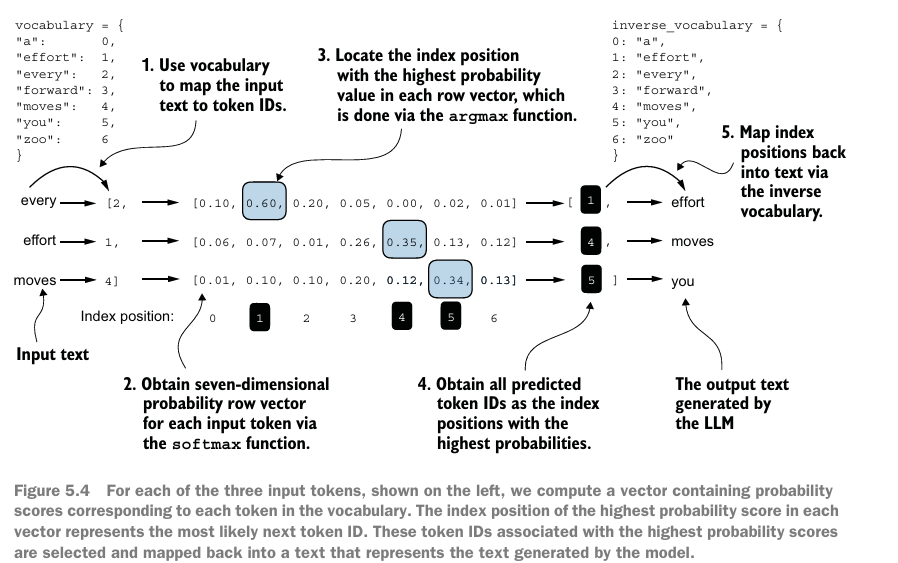
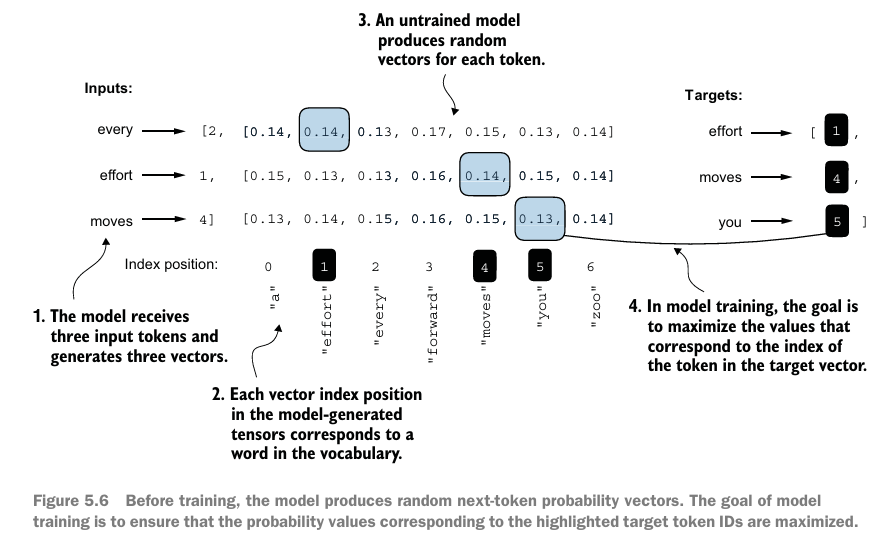
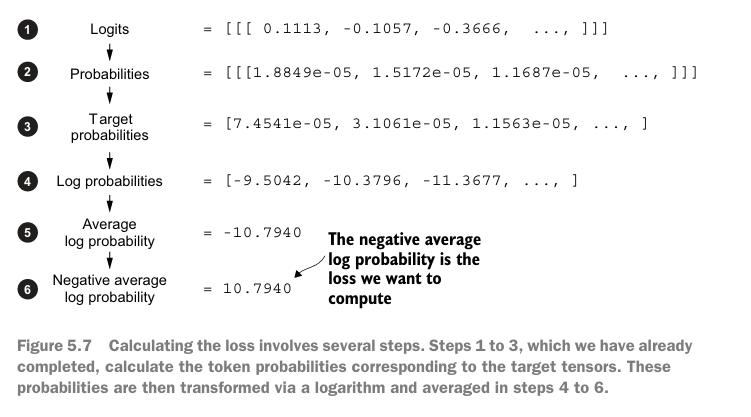

The goal is to get the average log probability as close to 0 as possible by updating the model’s weights as part of the training process. However, in deep learning, the common practice isn’t to push the average log probability up to 0 but rather to bring the negative average log probability down to 0. The negative average log probability is simply the average log probability multiplied by –1, which corresponds to step 6 in figure 5.7

we get log probabilities to zero probably since we want the probabality of the target tokens to be 1 (highest) 
and log(1) = 0   (my speculation)

In deep learning, the term for turning this negative value, –10.7940, into 10.7940, is known as the **cross entropy loss**. PyTorch comes in handy here, as it already has a built-in cross_entropy function that takes care of all these six steps in figure 5.7 for us.

**Cross entropy loss**

At its core, the cross entropy loss is a popular measure in machine learning and deep learning that measures the difference between two probability distributions—typically, the true distribution of labels (here, tokens in a dataset) and the predicted distribution from a model (for instance, the token probabilities generated by an LLM). 
In the context of machine learning and specifically in frameworks like PyTorch, the cross_entropy function computes this measure for discrete outcomes, which is similar to the negative average log probability of the target tokens given the model’s generated token probabilities, making the terms “cross entropy” and “negative average log probability” related and often used interchangeably in practice.

- read more about information leakage page 98
- refer to more stuff for more details about topics
  (currently softmax functions done)
- KEEP REFERRING TO SUMMARIES OF CHAPTERS and DO EXERCISES